In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv')
X=dataset.iloc[:,3:13].values
Y=dataset.iloc[:,13].values

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
ct = ColumnTransformer([("Encoding", OneHotEncoder(),[1,2])], remainder="passthrough")
X = ct.fit_transform(X) 
X = np.array(X,dtype=np.float64)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [11]:
X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(32,kernel_initializer='uniform',input_shape=(13,),activation='relu'))
classifier.add(Dense(16,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(16,kernel_initializer='uniform',activation='tanh'))
#classifier.add(Dense(16,kernel_initializer='uniform',activation='tanh'))
classifier.add(Dense(8,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'])

hist = classifier.fit(X,Y,validation_split=0.2,batch_size=10,epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 273us/step - loss: 0.4527 - acc: 0.7935 - val_loss: 0.4283 - val_acc: 0.8050
Epoch 2/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.4163 - acc: 0.8254 - val_loss: 0.4183 - val_acc: 0.8305
Epoch 3/100
8000/8000 [==============================] - 1s 161us/step - loss: 0.4125 - acc: 0.8342 - val_loss: 0.4160 - val_acc: 0.8295
Epoch 4/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.4102 - acc: 0.8365 - val_loss: 0.4157 - val_acc: 0.8260
Epoch 5/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.4074 - acc: 0.8379 - val_loss: 0.4157 - val_acc: 0.8260
Epoch 6/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.4057 - acc: 0.8360 - val_loss: 0.4144 - val_acc: 0.8265
Epoch 7/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.4043 - acc: 0.8379 - val_loss: 0.4123 - val_acc: 

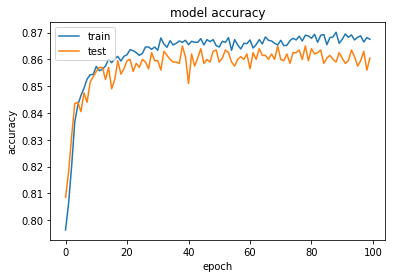

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
np.mean(hist.history['val_acc'])

0.8576749949827791

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

In [0]:
cm